Importation des librairies et des données :


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import time

In [ ]:
# Decimal = ',' hyper important pour que python comprenne les nombres
data = pd.read_csv('/home/onyxia/Projet_statapp/data/EMP_deplacements_Charme.csv', delimiter=';', decimal=',', encoding = "ISO-8859-1")
display(data)

Sélection des variables "heure de premier départ" pour chaque individu :


In [27]:
premiers_departs = data.groupby('IDENT_MEN')['HEURE_DEPART'].min()

Un premier aperçu de ces données :

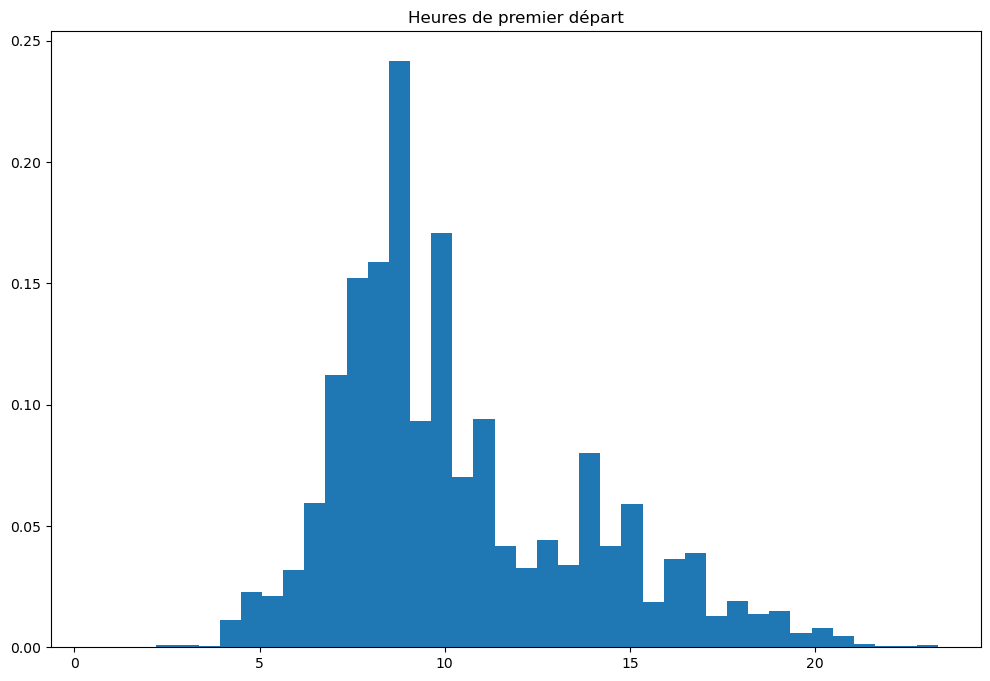

In [29]:
y, x = np.histogram(premiers_departs, bins=40, density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0
plt.figure(figsize=(12,8))
plt.hist(premiers_departs, bins=40, density=True)
plt.title("Heures de premier départ")
plt.show()

Programme essayant de trouver la meilleure loi de modélisation :

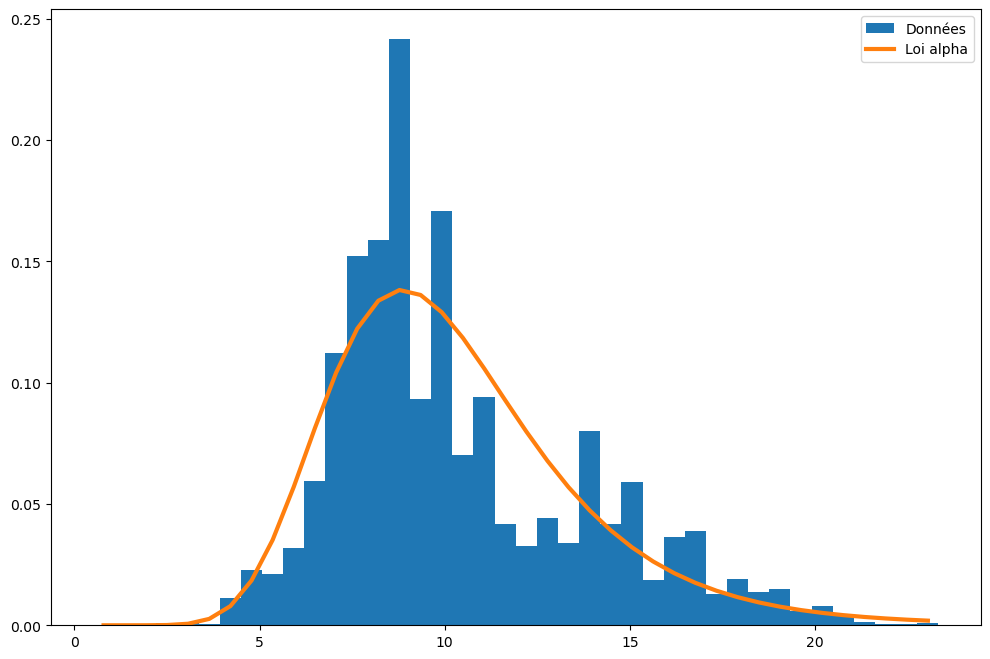

Selected Model :  alpha
Loc. param. :  -8.089564444860649
Scale param. :  104.99903407886063
Other arguments :  (5.869658573617832,)
SSE :  0.028327808740439588


In [30]:
dist_names = ['norm', 'beta','gamma', 'pareto', 't', 'lognorm', 'invgamma', 'invgauss',  'loggamma', 'alpha', 'chi', 'chi2']
sse = np.inf

# Pour chaque distribution
for name in dist_names:

  # Modéliser
  dist = getattr(scipy.stats, name)
  param = dist.fit(premiers_departs)

  # Paramètres
  loc = param[-2]
  scale = param[-1]
  arg = param[:-2]

  # PDF
  pdf = dist.pdf(x, *arg, loc=loc, scale=scale)
  # SSE
  model_sse = np.sum((y - pdf)**2)

  # Si le SSE est diminué, enregistrer la loi
  if model_sse < sse :
    best_pdf = pdf
    sse = model_sse
    best_loc = loc
    best_scale = scale
    best_arg = arg
    best_name = name

plt.figure(figsize=(12,8))
plt.hist(premiers_departs, bins=40, density=True, label="Données")
plt.plot(x, best_pdf, label="Loi " + best_name, linewidth=3)
plt.legend(loc='upper right')
plt.show()

# Détails sur la loi sélectionnée
print("Selected Model : ", best_name)
print("Loc. param. : ", best_loc)
print("Scale param. : ", best_scale)
print("Other arguments : ", best_arg)
print("SSE : ", sse)

# Deuxième étape :
Modéliser plus de lois pour être plus précis en fonction de 4 plages horaires.

In [31]:
display(premiers_departs)

IDENT_MEN
1100000114000    14.25
1100000115000     7.75
1100000135000    15.00
1100000136000     7.25
1100000144000     8.50
                 ...  
9400000361000    16.00
9400000364000     5.25
9400000415000    10.00
9400000441000     8.00
9400000521000     6.00
Name: HEURE_DEPART, Length: 7105, dtype: float64

In [ ]:
prem_dep_0_11 = premiers_departs[premiers_departs <= 11]
prem_dep_11_14 = premiers_departs[premiers_departs.between(11,14)]
prem_dep_14_17 = premiers_departs[premiers_departs.between(14,17)]
prem_dep_17_0 = premiers_departs[17< premiers_departs]

# 0H-11H :

In [ ]:
y, x = np.histogram(prem_dep_0_11, bins=40, density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0
#plt.figure(figsize=(12,8))
#plt.hist(prem_dep_matin, bins=40, density=True)
#plt.title("Heures de premier départ")
#plt.show()

dist_names = ['norm', 'beta','gamma', 'pareto', 't', 'lognorm', 'invgamma', 'invgauss',  'loggamma', 'alpha', 'chi', 'chi2']
sse = np.inf

# Pour chaque distribution
for name in dist_names:

  # Modéliser
  dist = getattr(scipy.stats, name)
  param = dist.fit(prem_dep_0_11)

  # Paramètres
  loc = param[-2]
  scale = param[-1]
  arg = param[:-2]

  # PDF
  pdf = dist.pdf(x, *arg, loc=loc, scale=scale)
  # SSE
  model_sse = np.sum((y - pdf)**2)

  # Si le SSE est diminué, enregistrer la loi
  if model_sse < sse :
    best_pdf = pdf
    sse = model_sse
    best_loc = loc
    best_scale = scale
    best_arg = arg
    best_name = name

plt.figure(figsize=(12,8))
plt.hist(prem_dep_0_11, bins=40, density=True, label="Données")
plt.plot(x, best_pdf, label="Loi " + best_name, linewidth=3)
plt.legend(loc='upper right')
plt.show()

# Détails sur la loi sélectionnée
print("Selected Model : ", best_name)
print("Loc. param. : ", best_loc)
print("Scale param. : ", best_scale)
print("Other arguments : ", best_arg)
print("SSE : ", sse)

# 11H-14H :

In [ ]:
y, x = np.histogram(prem_dep_11_14, bins=40, density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0
#plt.figure(figsize=(12,8))
#plt.hist(prem_dep_aprem, bins=40, density=True)
#plt.title("Heures de premier départ")
#plt.show()

dist_names = ['norm', 'beta','gamma', 'pareto', 't', 'lognorm', 'invgamma', 'invgauss',  'loggamma', 'alpha', 'chi', 'chi2']
sse = np.inf

# Pour chaque distribution
for name in dist_names:

  # Modéliser
  dist = getattr(scipy.stats, name)
  param = dist.fit(prem_dep_11_14)

  # Paramètres
  loc = param[-2]
  scale = param[-1]
  arg = param[:-2]

  # PDF
  pdf = dist.pdf(x, *arg, loc=loc, scale=scale)
  # SSE
  model_sse = np.sum((y - pdf)**2)

  # Si le SSE est diminué, enregistrer la loi
  if model_sse < sse :
    best_pdf = pdf
    sse = model_sse
    best_loc = loc
    best_scale = scale
    best_arg = arg
    best_name = name

plt.figure(figsize=(12,8))
plt.hist(prem_dep_11_14, bins=40, density=True, label="Données")
plt.plot(x, best_pdf, label="Loi " + best_name, linewidth=3)
plt.legend(loc='upper right')
plt.show()

# Détails sur la loi sélectionnée
print("Selected Model : ", best_name)
print("Loc. param. : ", best_loc)
print("Scale param. : ", best_scale)
print("Other arguments : ", best_arg)
print("SSE : ", sse)

**Note : 73,3% des premiers départs ont lieu le matin.**

# 14H-17H

In [ ]:
y, x = np.histogram(prem_dep_14_17, bins=7, density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0
#plt.figure(figsize=(12,8))
#plt.hist(prem_dep_aprem, bins=40, density=True)
#plt.title("Heures de premier départ")
#plt.show()

dist_names = ['norm', 'beta','gamma', 'pareto', 't', 'lognorm', 'invgamma', 'invgauss',  'loggamma', 'alpha', 'chi', 'chi2']
sse = np.inf

# Pour chaque distribution
for name in dist_names:

  # Modéliser
  dist = getattr(scipy.stats, name)
  param = dist.fit(prem_dep_14_17)

  # Paramètres
  loc = param[-2]
  scale = param[-1]
  arg = param[:-2]

  # PDF
  pdf = dist.pdf(x, *arg, loc=loc, scale=scale)
  # SSE
  model_sse = np.sum((y - pdf)**2)

  # Si le SSE est diminué, enregistrer la loi
  if model_sse < sse :
    best_pdf = pdf
    sse = model_sse
    best_loc = loc
    best_scale = scale
    best_arg = arg
    best_name = name

plt.figure(figsize=(12,8))
plt.hist(prem_dep_14_17, bins=7, density=True, label="Données")
plt.plot(x, best_pdf, label="Loi " + best_name, linewidth=3)
plt.legend(loc='upper right')
plt.show()

# Détails sur la loi sélectionnée
print("Selected Model : ", best_name)
print("Loc. param. : ", best_loc)
print("Scale param. : ", best_scale)
print("Other arguments : ", best_arg)
print("SSE : ", sse)

# 17H-00H

In [ ]:
y, x = np.histogram(prem_dep_17_0, bins=15, density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0
#plt.figure(figsize=(12,8))
#plt.hist(prem_dep_aprem, bins=40, density=True)
#plt.title("Heures de premier départ")
#plt.show()

dist_names = ['norm', 'beta','gamma', 'pareto', 't', 'lognorm', 'invgamma', 'invgauss',  'loggamma', 'alpha', 'chi', 'chi2']
sse = np.inf

# Pour chaque distribution
for name in dist_names:

  # Modéliser
  dist = getattr(scipy.stats, name)
  param = dist.fit(prem_dep_17_0)

  # Paramètres
  loc = param[-2]
  scale = param[-1]
  arg = param[:-2]

  # PDF
  pdf = dist.pdf(x, *arg, loc=loc, scale=scale)
  # SSE
  model_sse = np.sum((y - pdf)**2)

  # Si le SSE est diminué, enregistrer la loi
  if model_sse < sse :
    best_pdf = pdf
    sse = model_sse
    best_loc = loc
    best_scale = scale
    best_arg = arg
    best_name = name

plt.figure(figsize=(12,8))
plt.hist(prem_dep_17_0, bins=15, density=True, label="Données")
plt.plot(x, best_pdf, label="Loi " + best_name, linewidth=3)
plt.legend(loc='upper right')
plt.show()

# Détails sur la loi sélectionnée
print("Selected Model : ", best_name)
print("Loc. param. : ", best_loc)
print("Scale param. : ", best_scale)
print("Other arguments : ", best_arg)
print("SSE : ", sse)

## Séparation semaine - week-end :

In [36]:
prem_dep_semaine = data[data.TYPE_jour.isin(['lundi','mardi','mercredi','jeudi','vendredi'])].groupby('IDENT_MEN')['HEURE_DEPART'].min()
prem_dep_weekend = data[data.TYPE_jour.isin(['samedi','dimanche'])].groupby('IDENT_MEN')['HEURE_DEPART'].min()

# Premier départ la semaine :

/opt/mamba/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


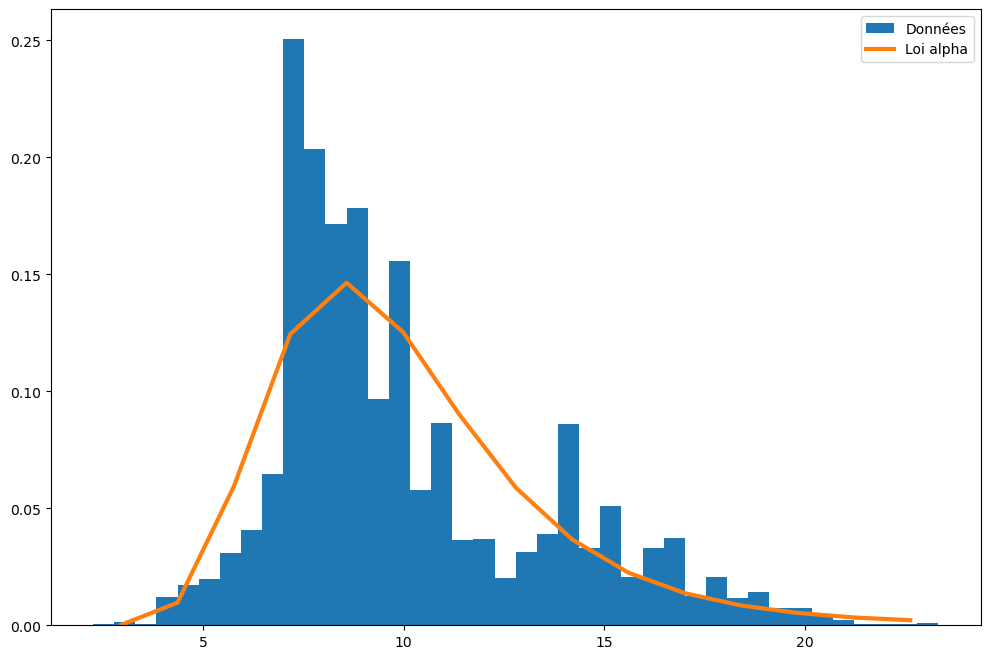

Selected Model :  alpha
Loc. param. :  -5.541897813695191
Scale param. :  76.90907739366861
Other arguments :  (5.131285314442717,)
SSE :  0.006278762689993546


In [38]:
y, x = np.histogram(prem_dep_semaine, bins=15, density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0
#plt.figure(figsize=(12,8))
#plt.hist(prem_dep_aprem, bins=40, density=True)
#plt.title("Heures de premier départ")
#plt.show()


dist_names = ['norm', 'beta','gamma', 'pareto', 't', 'lognorm', 'invgamma', 'invgauss',  'loggamma', 'alpha', 'chi', 'chi2']
sse = np.inf

# Pour chaque distribution
for name in dist_names:

  # Modéliser
  dist = getattr(scipy.stats, name)
  param = dist.fit(prem_dep_semaine)

  # Paramètres
  loc = param[-2]
  scale = param[-1]
  arg = param[:-2]

  # PDF
  pdf = dist.pdf(x, *arg, loc=loc, scale=scale)
  # SSE
  model_sse = np.sum((y - pdf)**2)

  # Si le SSE est diminué, enregistrer la loi
  if model_sse < sse :
    best_pdf = pdf
    sse = model_sse
    best_loc = loc
    best_scale = scale
    best_arg = arg
    best_name = name

plt.figure(figsize=(12,8))
plt.hist(prem_dep_semaine, bins=40, density=True, label="Données")
plt.plot(x, best_pdf, label="Loi " + best_name, linewidth=3)
plt.legend(loc='upper right')
plt.show()

# Détails sur la loi sélectionnée
print("Selected Model : ", best_name)
print("Loc. param. : ", best_loc)
print("Scale param. : ", best_scale)
print("Other arguments : ", best_arg)
print("SSE : ", sse)

# Premier départ le week-end :

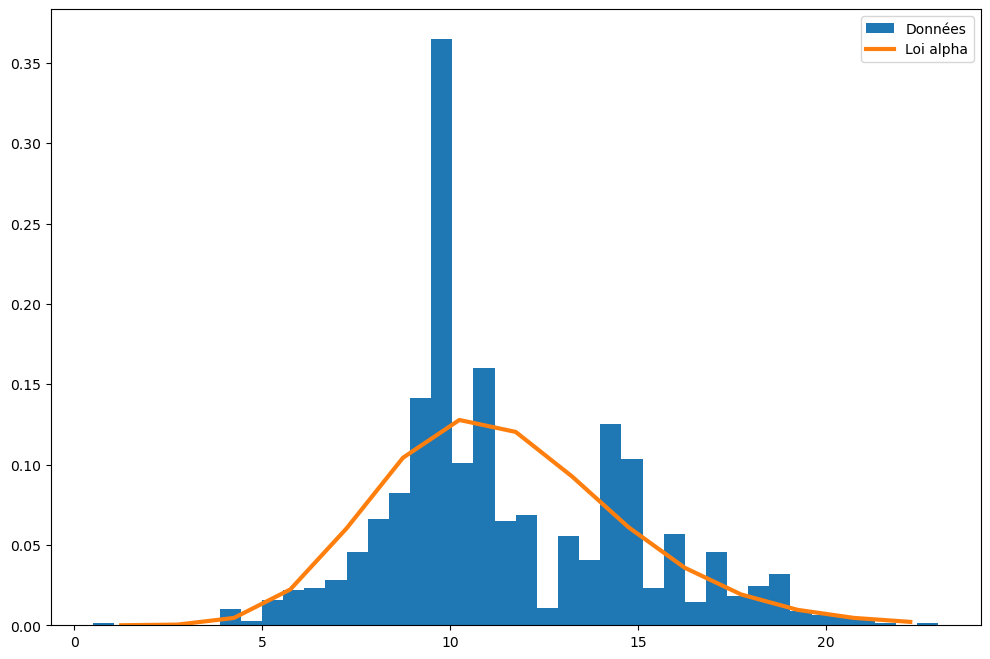

Selected Model :  alpha
Loc. param. :  -23.16370926650599
Scale param. :  373.886232115011
Other arguments :  (10.891430195119693,)
SSE :  0.007423711096221617


In [39]:
y, x = np.histogram(prem_dep_weekend, bins=15, density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0
#plt.figure(figsize=(12,8))
#plt.hist(prem_dep_aprem, bins=40, density=True)
#plt.title("Heures de premier départ")
#plt.show()


dist_names = ['norm', 'beta','gamma', 'pareto', 't', 'lognorm', 'invgamma', 'invgauss',  'loggamma', 'alpha', 'chi', 'chi2']
sse = np.inf

# Pour chaque distribution
for name in dist_names:

  # Modéliser
  dist = getattr(scipy.stats, name)
  param = dist.fit(prem_dep_weekend)

  # Paramètres
  loc = param[-2]
  scale = param[-1]
  arg = param[:-2]

  # PDF
  pdf = dist.pdf(x, *arg, loc=loc, scale=scale)
  # SSE
  model_sse = np.sum((y - pdf)**2)

  # Si le SSE est diminué, enregistrer la loi
  if model_sse < sse :
    best_pdf = pdf
    sse = model_sse
    best_loc = loc
    best_scale = scale
    best_arg = arg
    best_name = name

plt.figure(figsize=(12,8))
plt.hist(prem_dep_weekend, bins=40, density=True, label="Données")
plt.plot(x, best_pdf, label="Loi " + best_name, linewidth=3)
plt.legend(loc='upper right')
plt.show()

# Détails sur la loi sélectionnée
print("Selected Model : ", best_name)
print("Loc. param. : ", best_loc)
print("Scale param. : ", best_scale)
print("Other arguments : ", best_arg)
print("SSE : ", sse)